<a href="https://colab.research.google.com/github/alfiramdhan/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Transaction
url = "https://drive.google.com/file/d/11nYwh8cxKl7rHccMCsJy7jaBVNcktWeL/view?usp=share_link"
output = "df_trans.pickle"
gdown.download(url, output, quiet=False, fuzzy=True)

trans = pd.read_pickle('/content/df_trans.pickle')
trans

Downloading...
From: https://drive.google.com/uc?id=11nYwh8cxKl7rHccMCsJy7jaBVNcktWeL
To: /content/df_trans.pickle
100%|██████████| 97.3M/97.3M [00:00<00:00, 157MB/s]


,po_number,transaction_date,order_id,order_status,payment_group,shipping_agency,shipping_cost,total_project_value,revenue,seller_id,...,product_name,main_cat,brand,price_per_item,quantity,price_total,free_shipping,ppn,weight_total,unit
0,PO-2022-12-12-8804434,2022-12-12,463776,Selesai,TOP,mandiriva,0,53280000,399600,None,...,Oli Compressor ATLAS Synthetic base,Pertukangan,ROTO Synthetic,16000000.0,3,48000000,True,5280000,90000,pcs
1,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Neonbox LED dengan tiang Saung Pananjung Bandung,Jasa Advertising,None,6000000.0,1,6000000,True,660000,17500,pcs
2,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Wallpaper Ayam Goreng Bang Toung Jakarta,Jasa Percetakan & Media,None,2348760.0,1,2348760,True,258364,10967,pcs
3,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Backdrop Pondok Indah Cipala Banten,Jasa Percetakan & Media,None,1898750.0,1,1898750,True,208862,6767,pcs
4,PO-2022-10-11-4866339,2022-10-11,426155,Selesai,TOP,mps-briva,0,78775501,590816,631a50645b9755003d24d6b9,...,Alas Meja Pondok Indah Cipala Banten,Jasa Percetakan & Media,None,1021410.0,1,1021410,True,112355,3440,pcs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474565,PO-2022-11-30-4342388,2022-11-30,455045,Selesai,Direct,QREN,9000,59000,442,63aa70cbcb47446d5bdef77a,...,Cheese Stick 100g,Makanan & Minuman,TRIQUE,50000.0,1,50000,False,0,200,pcs
474566,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,42000,142000,1065,63aa720fcb47446d5bdf1413,...,Kebab Mini,Makanan & Minuman,FROZEN CB 8,20000.0,2,40000,False,0,1000,pack
474567,PO-2022-06-07-123774,2022-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,42000,142000,1065,63aa720fcb47446d5bdf1413,...,Tahu Baso Sapi,Makanan & Minuman,FROZEN CB 8,20000.0,3,60000,False,0,1500,pack
474568,PO-2022-07-21-143881,2022-07-21,293510,Selesai,Direct,QREN,0,6500,48,63aa832bcb47446d5be0c3dd,...,Pulsa Elektrik Telkomsel 5 Ribu,Barang Lainnya,Telkomsel,6500.0,1,6500,True,0,10,pcs


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            474570 non-null  object 
 1   transaction_date     474570 non-null  dbdate 
 2   order_id             474570 non-null  Int64  
 3   order_status         474570 non-null  object 
 4   payment_group        474570 non-null  object 
 5   shipping_agency      474570 non-null  object 
 6   shipping_cost        474570 non-null  Int64  
 7   total_project_value  474570 non-null  Int64  
 8   revenue              474570 non-null  Int64  
 9   seller_id            474559 non-null  object 
 10  seller_category      474559 non-null  object 
 11  buyer_id             474570 non-null  object 
 12  seller_province      474559 non-null  object 
 13  seller_city          474559 non-null  object 
 14  seller_flag          474559 non-null  object 
 15  buyer_province   

In [ ]:
# convert the order_id to object
#trans['order_id'] = trans['order_id'].astype(str)

# Convert the column to datetime format
trans['transaction_date'] = pd.to_datetime(trans['transaction_date'], format='%Y-%m-%d')

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            474570 non-null  object        
 1   transaction_date     474570 non-null  datetime64[ns]
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

## Descriptive Statistics

In [ ]:
# NUMERIC
desc_eda = trans.describe()
desc_eda.loc['kurtosis'] = trans.kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = trans.skew() #show Skewness statistic
desc_eda.loc['variance'] = trans.var() #show variance statistic
desc_eda.round(2)

<ipython-input-20-92d222c0de35>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desc_eda.loc['kurtosis'] = trans.kurt() #show kurtosis statistic
<ipython-input-20-92d222c0de35>:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  desc_eda.loc['skewness'] = trans.skew() #show Skewness statistic
<ipython-input-20-92d222c0de35>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid colu

,order_id,shipping_cost,total_project_value,revenue,price_per_item,quantity,price_total,ppn,weight_total
count,474570.0,474570.0,474570.0,474570.0,4.745700e+05,474570.0,474570.0,474570.0,474570.0
mean,296743.35,109800.29,26632187.12,178905.57,4.185188e+06,170.27,7020426.97,663049.47,1816189.96
std,151777.9,9590264.11,119474402.89,394328.23,3.371534e+07,7245.43,37705405.31,4482224.91,54108156.33
min,1.0,-2160.0,0.0,0.0,1.000000e+00,0.0,0.0,0.0,0.0
25%,160733.25,0.0,2094054.0,15705.0,2.000000e+04,1.0,105000.0,996.0,1000.0
50%,332979.0,0.0,7539289.0,56544.0,7.848000e+04,4.0,590000.0,30000.0,3000.0
75%,436487.0,0.0,26433170.0,198248.0,5.803750e+05,12.0,3300000.0,264000.0,15000.0
max,476883.0,6000000000.0,44990400000.0,112476000.0,2.147480e+09,3116000.0,2147483647.0,1172050000.0,2147483647.0
kurtosis,-1.25,323635.83,84906.91,27836.28,1.587610e+03,78681.54,1200.96,13875.69,1476.98
skewness,-0.47,527.54,231.85,101.32,3.246000e+01,222.8,27.59,79.08,37.93


In [ ]:
# String
objects = ['po_number','order_id', 'order_status', 'payment_group', 'shipping_agency',
           'seller_id', 'seller_category','buyer_id', 'seller_province', 'seller_city',
           'seller_flag', 'buyer_province', 'buyer_city', 'buyer_flag', 'product_id',
           'product_name', 'main_cat','brand']
trans[objects].describe()

,order_id
count,474570.0
mean,296743.347704
std,151777.895164
min,1.0
25%,160733.25
50%,332979.0
75%,436487.0
max,476883.0


In [ ]:
# date
trans['transaction_date'].describe()

<ipython-input-22-345ed94a3d2c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans['transaction_date'].describe()


count                  474570
unique                    363
top       2022-10-12 00:00:00
freq                     7794
first     2022-01-01 00:00:00
last      2022-12-31 00:00:00
Name: transaction_date, dtype: object

## Trends

In [ ]:
# Seller distribution
trans.groupby(['seller_category'])['seller_id'].nunique().sort_values(ascending=False)

seller_category
Mikro       2893
Kecil       2116
Menengah    1561
Besar         58
Swasta        32
Name: seller_id, dtype: int64

In [ ]:
# top 10 seller by revenue
trans.groupby(['seller_id','seller_category'])['revenue'].sum().sort_values(ascending=False)

seller_id                 seller_category
631a50a27255a77e0e6e7887  Mikro              2810033457
631a507f7255a77e0e6e3834  Menengah           1789922007
631a599d5b9755003d2888cc  Besar               853926447
631a53e47255a77e0e6f927c  Mikro               773685639
631a66dc8755a8a989634dcb  Kecil               761265034
                                                ...    
631a6836cdc00cf233d44200  Mikro                      90
6373418ddedb22dd0fb7e097  Mikro                      75
632d3d246ea056486c73aa9a  Mikro                      14
631a77117476cace453fb3f6  Mikro                      11
631a539b5b9755003d25fe8a  Menengah                    8
Name: revenue, Length: 6660, dtype: Int64

In [ ]:
trans.set_index('transaction_date', inplace=True)

In [ ]:
# Monthly ARPU
monthly_ARPU = trans.groupby([pd.Grouper(freq='M'), 'seller_id'])['revenue'].nunique().groupby('transaction_date').mean().sort_values(ascending=False)
monthly_ARPU

transaction_date
2022-12-31    5.384028
2022-10-31    5.135200
2022-11-30    4.611057
2022-09-30    4.382061
2022-08-31    4.366574
2022-07-31    4.257732
2022-06-30    4.134552
2022-03-31    4.085154
2022-04-30    3.746450
2022-05-31    3.388014
2022-02-28    3.267415
2022-01-31    3.209976
Name: revenue, dtype: float64

In [ ]:
# Calculate the monthly_gmv
monthly_gmv = trans['total_project_value'].resample('M').sum()
monthly_gmv

transaction_date
2022-01-31     636193919059
2022-02-28     640664368602
2022-03-31    1016912261637
2022-04-30     789148795982
2022-05-31     644203048139
2022-06-30     942477910532
2022-07-31    1091646419375
2022-08-31    1157553320126
2022-09-30    1078810554103
2022-10-31    1495871128492
2022-11-30    1298947345155
2022-12-31    1846407971192
Freq: M, Name: total_project_value, dtype: Int64

In [ ]:
# monthly orders
# Set the 'transaction_date' column as the DataFrame's index
# df_trans.set_index('transaction_date', inplace=True)

# Calculate the orders
monthly_order = trans['order_id'].resample('M').nunique()
monthly_order

transaction_date
2022-01-31     7301
2022-02-28     7627
2022-03-31    12381
2022-04-30    10264
2022-05-31     8527
2022-06-30    12732
2022-07-31    13971
2022-08-31    14247
2022-09-30    14486
2022-10-31    19797
2022-11-30    16248
2022-12-31    21538
Freq: M, Name: order_id, dtype: int64

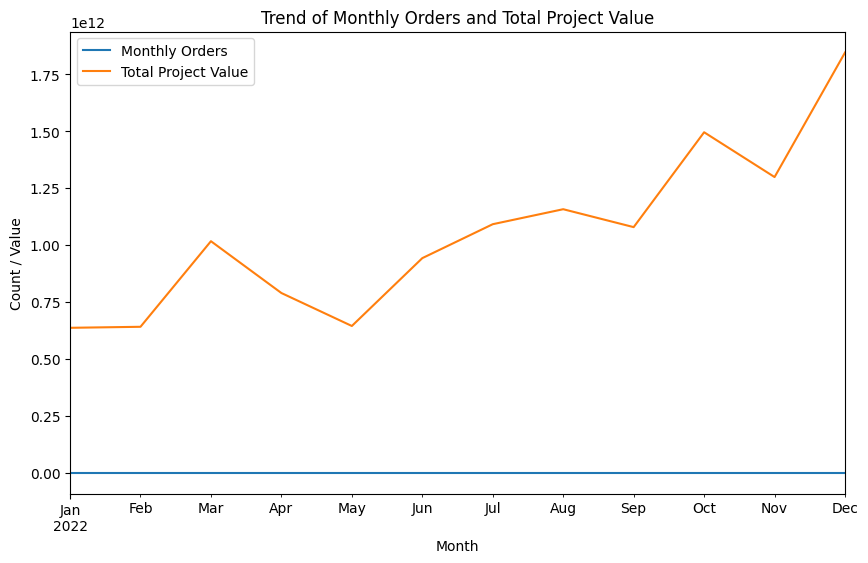

In [ ]:
# Plot the trend of monthly orders and total project value
plt.figure(figsize=(10, 6))
monthly_order.plot(label='Monthly Orders')
monthly_gmv.plot(label='Total Project Value')
plt.xlabel('Month')
plt.ylabel('Count / Value')
plt.title('Trend of Monthly Orders and Total Project Value')
plt.legend()
plt.show()

In [ ]:
# Calculate the daily_gmv
daily_gmv = trans['total_project_value'].resample('D').sum().sort_values(ascending=False)
daily_gmv

transaction_date
2022-12-12    239223114080
2022-10-12    204201057702
2022-10-11    192171476151
2022-12-13    153253162428
2022-01-25    115725858040
                  ...     
2022-01-09         8020500
2022-09-17         7770000
2022-05-02          528000
2022-05-03               0
2022-09-18               0
Name: total_project_value, Length: 365, dtype: Int64

<Axes: xlabel='transaction_date'>

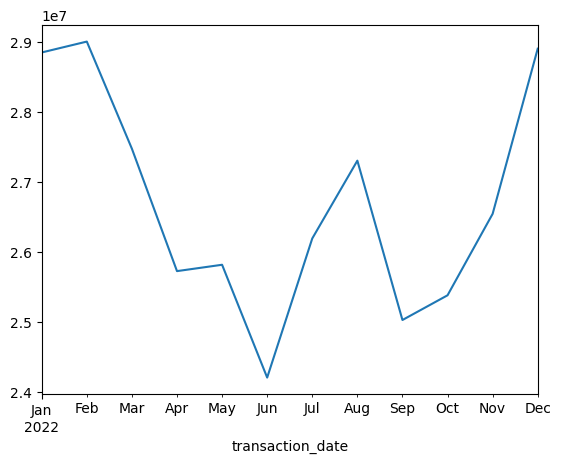

In [ ]:
# trend of monthly aov
monthly_aov = trans['total_project_value'].resample('M').mean()
monthly_aov.plot(kind='line')

In [ ]:
# Resample the data on a monthly basis and calculate the average order per user
monthly_average_order_per_user = trans.groupby([pd.Grouper(freq='M'), 'buyer_id'])['order_id'].nunique().groupby('transaction_date').mean().sort_values(ascending=False)
monthly_average_order_per_user

transaction_date
2022-12-31    3.762753
2022-10-31    3.621844
2022-11-30    3.279774
2022-08-31    3.103245
2022-09-30    3.077544
2022-07-31    3.018799
2022-06-30    2.908842
2022-03-31    2.864646
2022-04-30    2.613700
2022-05-31    2.460895
2022-02-28    2.347492
2022-01-31    2.315572
Name: order_id, dtype: float64

# Seller - Hierarchy

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [ ]:
df_hie=trans.copy(deep=True)
df_hie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   po_number            474570 non-null  object        
 1   transaction_date     474570 non-null  datetime64[ns]
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

In [ ]:
snapshot_date = df_hie['transaction_date'].max() + pd.DateOffset(days=1)
hie_seller = df_hie.groupby(['seller_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'})
print(hie_seller)

                          transaction_date  order_id   revenue
seller_id                                                     
631a50645b9755003d24d6b9                24        23  14305774
631a50655b9755003d24d78a                19         5   8257295
631a50655b9755003d24d7fe                67         1    790875
631a50675b9755003d24da41                10        27  21494890
631a50685b9755003d24dd24                 5         2    553112
...                                    ...       ...       ...
63aa720fcb47446d5bdf1413               208         2      2130
63aa7f65cb47446d5be08839                13         1     10875
63aa832bcb47446d5be0c3dd                32         2       250
63aabe5ccb47446d5be51656                40         3   3396922
63aad535f2bdefdb4a1494a2               170         1    763034

[6660 rows x 3 columns]


In [ ]:
hie_seller.rename(columns={'transaction_date': 'Recency',
                        'order_id': 'Frequency',
                        'revenue': 'MonetaryValue'}, inplace=True)
print(hie_seller)

                          Recency  Frequency  MonetaryValue
seller_id                                                  
631a50645b9755003d24d6b9       24         23       14305774
631a50655b9755003d24d78a       19          5        8257295
631a50655b9755003d24d7fe       67          1         790875
631a50675b9755003d24da41       10         27       21494890
631a50685b9755003d24dd24        5          2         553112
...                           ...        ...            ...
63aa720fcb47446d5bdf1413      208          2           2130
63aa7f65cb47446d5be08839       13          1          10875
63aa832bcb47446d5be0c3dd       32          2            250
63aabe5ccb47446d5be51656       40          3        3396922
63aad535f2bdefdb4a1494a2      170          1         763034

[6660 rows x 3 columns]


In [ ]:
cluster_labels = model.fit_predict(hie_seller)
cluster_labels

array([6465, 5775, 6105, ...,    1,    2,    0])

In [ ]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5]

array([[4.61300000e+03, 4.74500000e+03, 1.41421356e+00, 2.00000000e+00],
       [5.74900000e+03, 5.93100000e+03, 1.41421356e+00, 2.00000000e+00],
       [6.56000000e+03, 6.56200000e+03, 1.41421356e+00, 2.00000000e+00],
       [6.54100000e+03, 6.55100000e+03, 1.41421356e+00, 2.00000000e+00],
       [6.64600000e+03, 6.64700000e+03, 1.41421356e+00, 2.00000000e+00]])

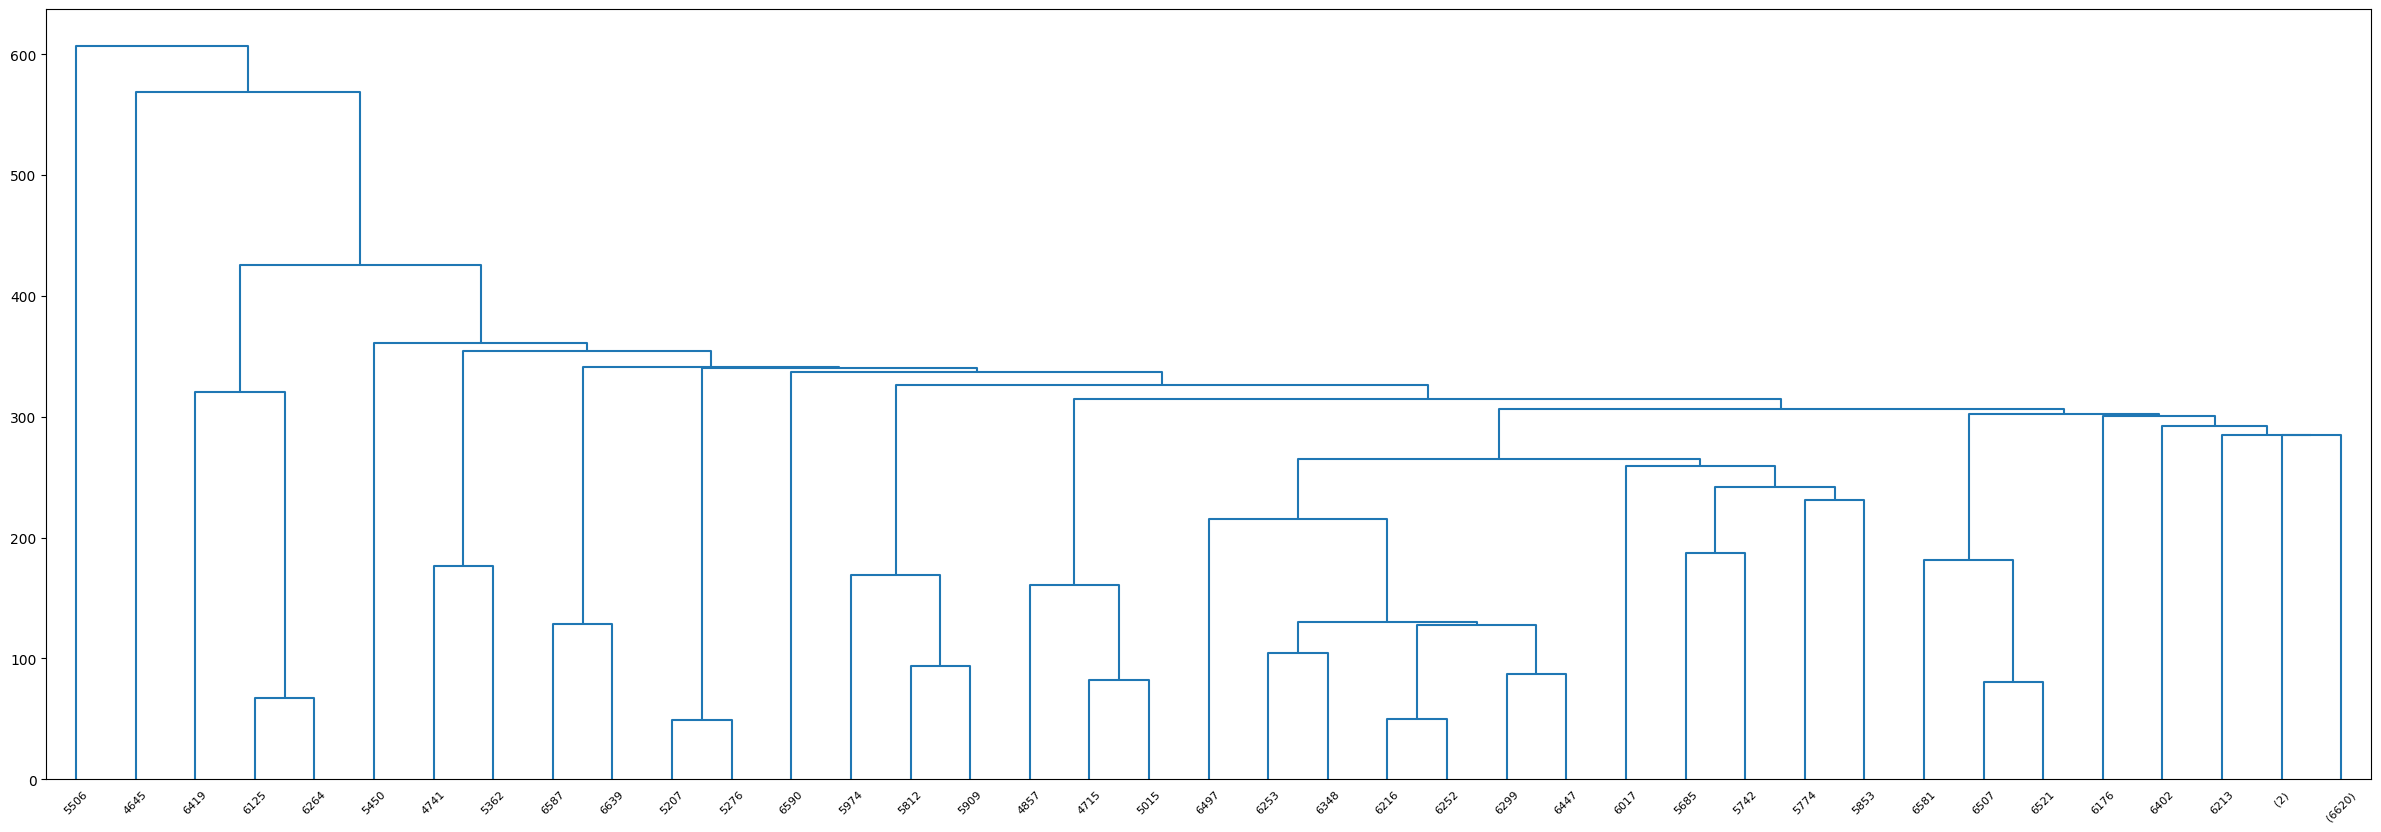

In [ ]:
plt.figure(figsize=(30,10))
hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange']) # set colors for the clusters
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23) # color_threshold=23 sets clusters below y-axis value of 23 to be of the same color

In [ ]:
model = AgglomerativeClustering(n_clusters=3)

In [ ]:
hie_seller['cluster']=model.fit_predict(hie_seller) # predict the categories for each point.

In [ ]:
hie_seller.groupby(['cluster'])['Recency', 'Frequency', 'MonetaryValue'].sum()

<ipython-input-15-0dc4d31c8294>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hie_seller.groupby(['cluster'])['Recency', 'Frequency', 'MonetaryValue'].sum()


,Recency,Frequency,MonetaryValue
cluster,,,
0,1150,159926,35786365001
1,462413,308075,44516407248
2,3,6558,4599955464


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, 

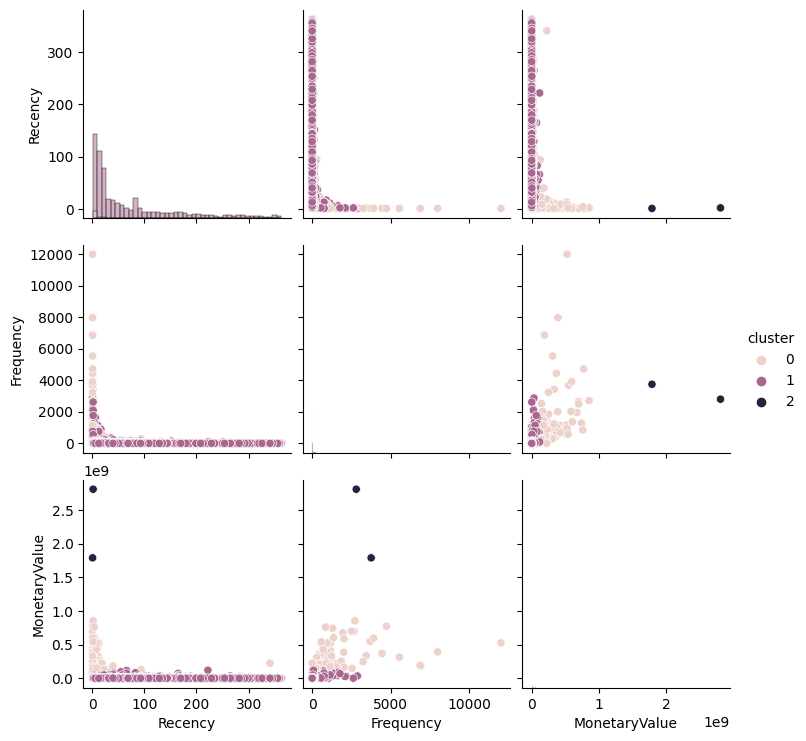

In [ ]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(hie_seller ,hue='cluster', diag_kind="hist")

<Axes: xlabel='Recency', ylabel='Frequency'>

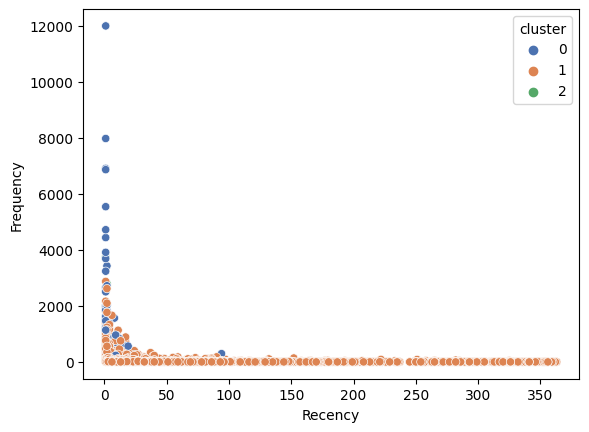

In [ ]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=hie_seller, palette="deep")

<Axes: xlabel='Recency', ylabel='MonetaryValue'>

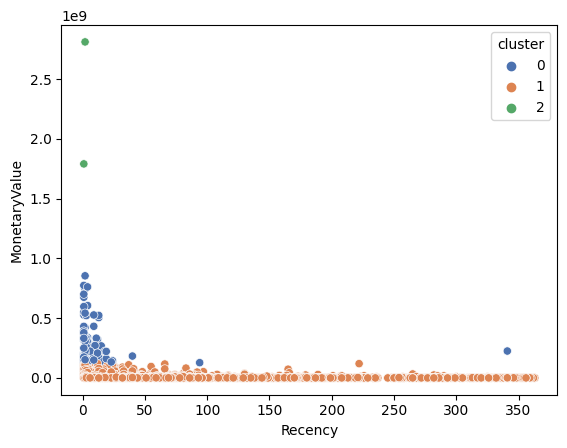

In [ ]:
# create a scatter plot of the data with different colors for each cluster
sns.scatterplot(x='Recency', y='MonetaryValue', hue='cluster', data=hie_seller, palette="deep")

In [ ]:
hie_seller['cluster'].value_counts()

1    6521
0     137
2       2
Name: cluster, dtype: int64

In [ ]:
hie_seller.groupby('cluster').mean()

,Recency,Frequency,MonetaryValue
cluster,,,
0,8.39,1167.34,261214343.07
1,70.91,47.24,6826622.80
2,1.50,3279.00,2299977732.00


In [ ]:
hie_seller = hie_seller.reset_index()

In [ ]:
# We Group the data to see unique user characteristics
seller_clust = hie_seller.groupby('cluster').agg({
    'seller_id' : 'count',
    'Recency': 'sum',
    'Frequency': 'sum',
    'MonetaryValue' : 'sum'
}).reset_index()

seller_clust

,cluster,seller_id,Recency,Frequency,MonetaryValue
0,0,137,1150,159926,35786365001
1,1,6521,462413,308075,44516407248
2,2,2,3,6558,4599955464


# Seller - KMeans

## Determining Variables

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)

In [ ]:
seller = trans.copy()
seller.reset_index(inplace=True)
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     474570 non-null  datetime64[ns]
 1   po_number            474570 non-null  object        
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

In [ ]:
snapshot_date = seller['transaction_date'].max() + pd.DateOffset(days=1)
rfm_seller = seller.groupby(['seller_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'})
print(rfm_seller)

                          transaction_date  order_id   revenue
seller_id                                                     
631a50645b9755003d24d6b9                24        23  14305774
631a50655b9755003d24d78a                19         5   8257295
631a50655b9755003d24d7fe                67         1    790875
631a50675b9755003d24da41                10        27  21494890
631a50685b9755003d24dd24                 5         2    553112
...                                    ...       ...       ...
63aa720fcb47446d5bdf1413               208         2      2130
63aa7f65cb47446d5be08839                13         1     10875
63aa832bcb47446d5be0c3dd                32         2       250
63aabe5ccb47446d5be51656                40         3   3396922
63aad535f2bdefdb4a1494a2               170         1    763034

[6660 rows x 3 columns]


In [ ]:
rfm_seller.rename(columns={'transaction_date': 'Recency',
                        'order_id': 'Frequency',
                        'revenue': 'MonetaryValue'}, inplace=True)
print(rfm_seller)

                          Recency  Frequency  MonetaryValue
seller_id                                                  
631a50645b9755003d24d6b9       24         23       14305774
631a50655b9755003d24d78a       19          5        8257295
631a50655b9755003d24d7fe       67          1         790875
631a50675b9755003d24da41       10         27       21494890
631a50685b9755003d24dd24        5          2         553112
...                           ...        ...            ...
63aa720fcb47446d5bdf1413      208          2           2130
63aa7f65cb47446d5be08839       13          1          10875
63aa832bcb47446d5be0c3dd       32          2            250
63aabe5ccb47446d5be51656       40          3        3396922
63aad535f2bdefdb4a1494a2      170          1         763034

[6660 rows x 3 columns]


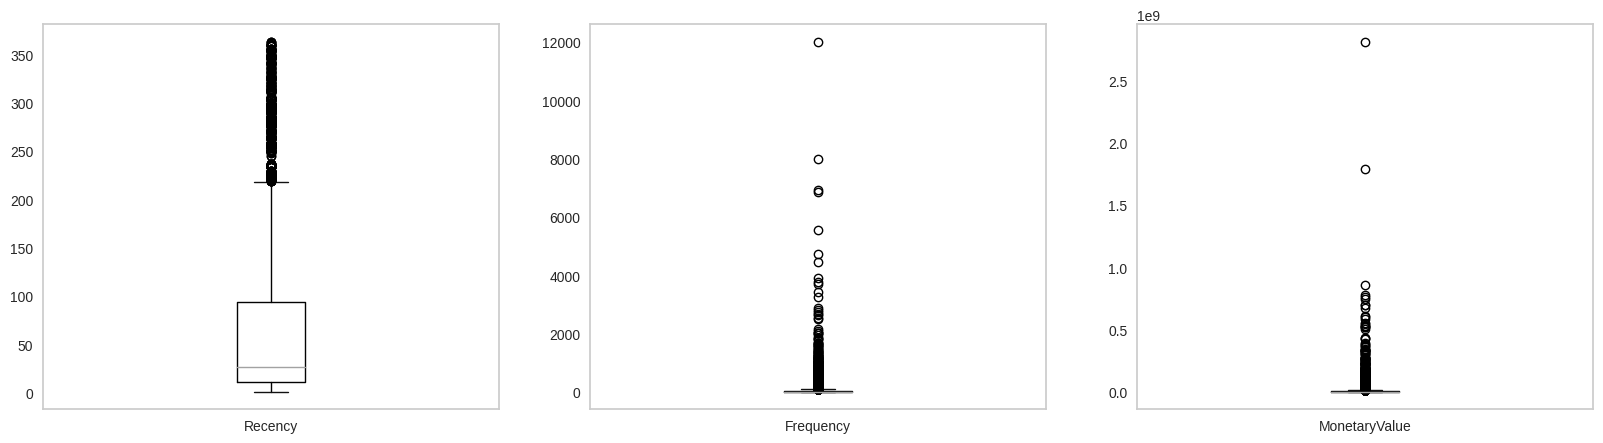

In [ ]:
# check outlier
col_list = ['Recency','Frequency','MonetaryValue']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = rfm_seller.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
X = rfm_seller[['Recency', 'Frequency', 'MonetaryValue']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
rfm_seller['cluster'] = kmeans.labels_

In [ ]:
rfm_seller['cluster'].value_counts()

0    5290
1    1347
2      23
Name: cluster, dtype: int64

In [ ]:
rfm_seller.groupby(['cluster'])['Recency', 'Frequency', 'MonetaryValue'].mean()

,Recency,Frequency,MonetaryValue
cluster,,,
0,32.60,72.18,12767063.42
1,216.09,3.59,1303384.16
2,1.57,3821.78,678665379.91


<Axes: xlabel='cluster', ylabel='Recency'>

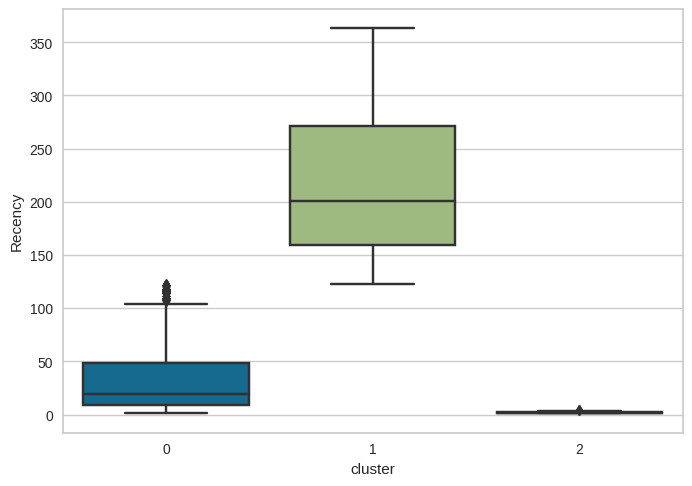

In [ ]:
sns.boxplot(data = rfm_seller, x = 'cluster', y = 'Recency')

<Axes: xlabel='cluster', ylabel='Frequency'>

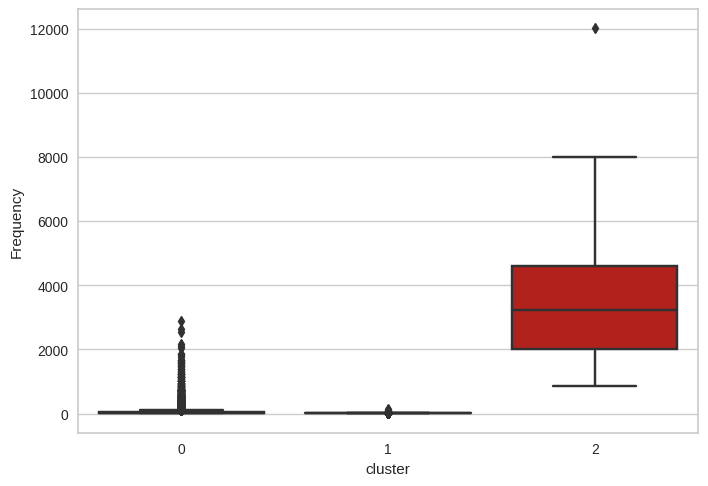

In [ ]:
sns.boxplot(data = rfm_seller, x = 'cluster', y = 'Frequency')

<Axes: xlabel='cluster', ylabel='MonetaryValue'>

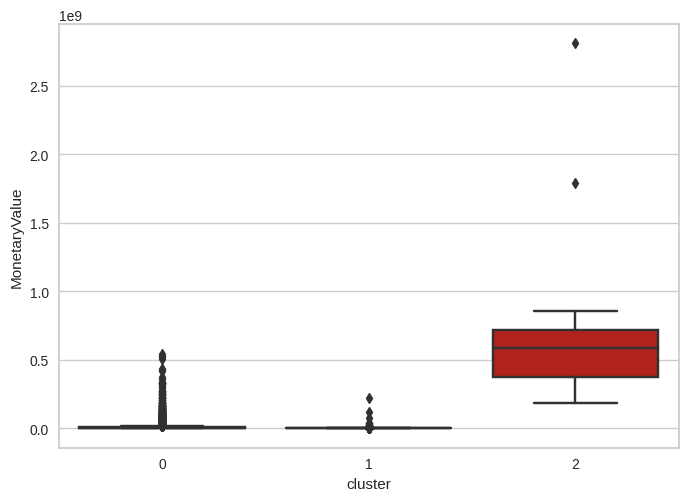

In [ ]:
sns.boxplot(data = rfm_seller, x = 'cluster', y = 'MonetaryValue')

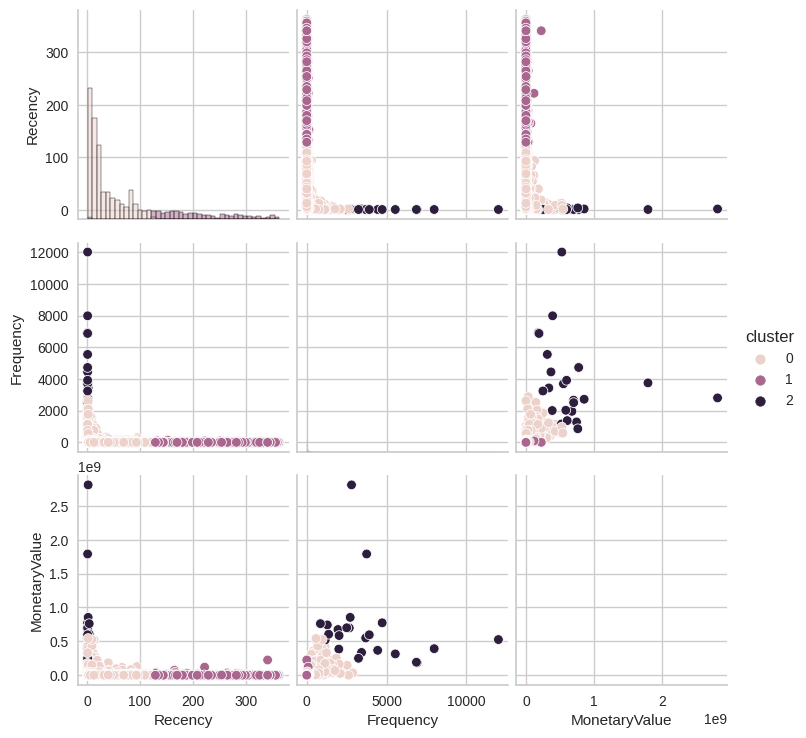

In [ ]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(rfm_seller ,hue='cluster', diag_kind="hist")

## Elbow Method

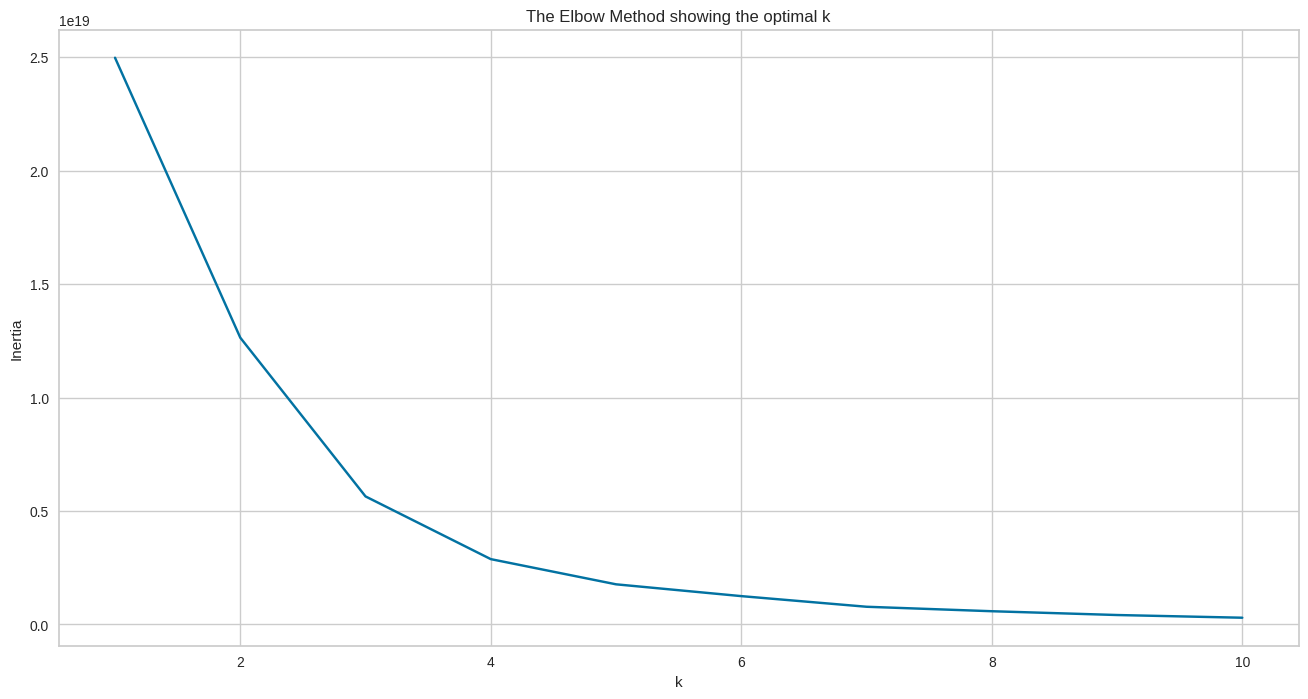

[2.497825621335027e+19, 1.2640233304537168e+19, 5.64252633670998e+18, 2.878624286044131e+18, 1.768294104081492e+18, 1.2479804188704906e+18, 7.792316263312973e+17, 5.821166693460964e+17, 4.1501043559058214e+17, 2.9584899824908666e+17]


In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(X)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

## Silhouette

In [ ]:
#import silhouette
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0.9492420153401037

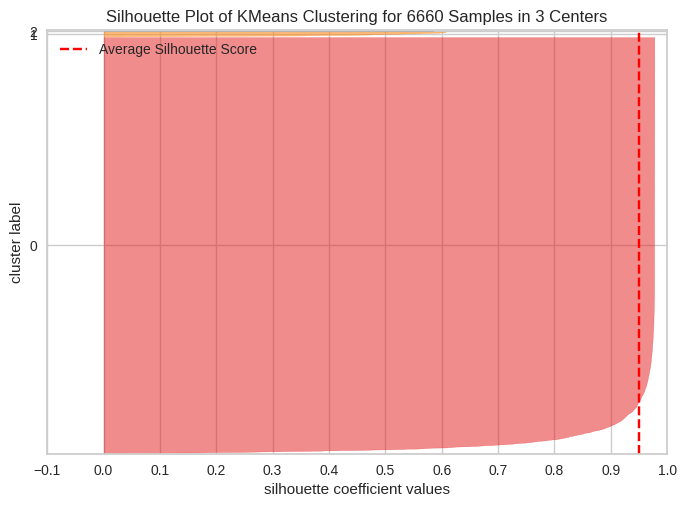

In [ ]:
# Untuk k=3 clusters
cluster_model = KMeans(n_clusters = 3, random_state = 42)
cluster_model.fit(X)

sil = SilhouetteVisualizer(cluster_model, is_fitted = True)
sil.fit(X)
sil.finalize()
sil.silhouette_score_

For k=2, the average silhouette score is 0.9648151016226508
For k=3, the average silhouette score is 0.9492420153401037
For k=4, the average silhouette score is 0.9054663447319926
For k=5, the average silhouette score is 0.88778223865556
For k=6, the average silhouette score is 0.8875762875862651
For k=7, the average silhouette score is 0.8537237419854132


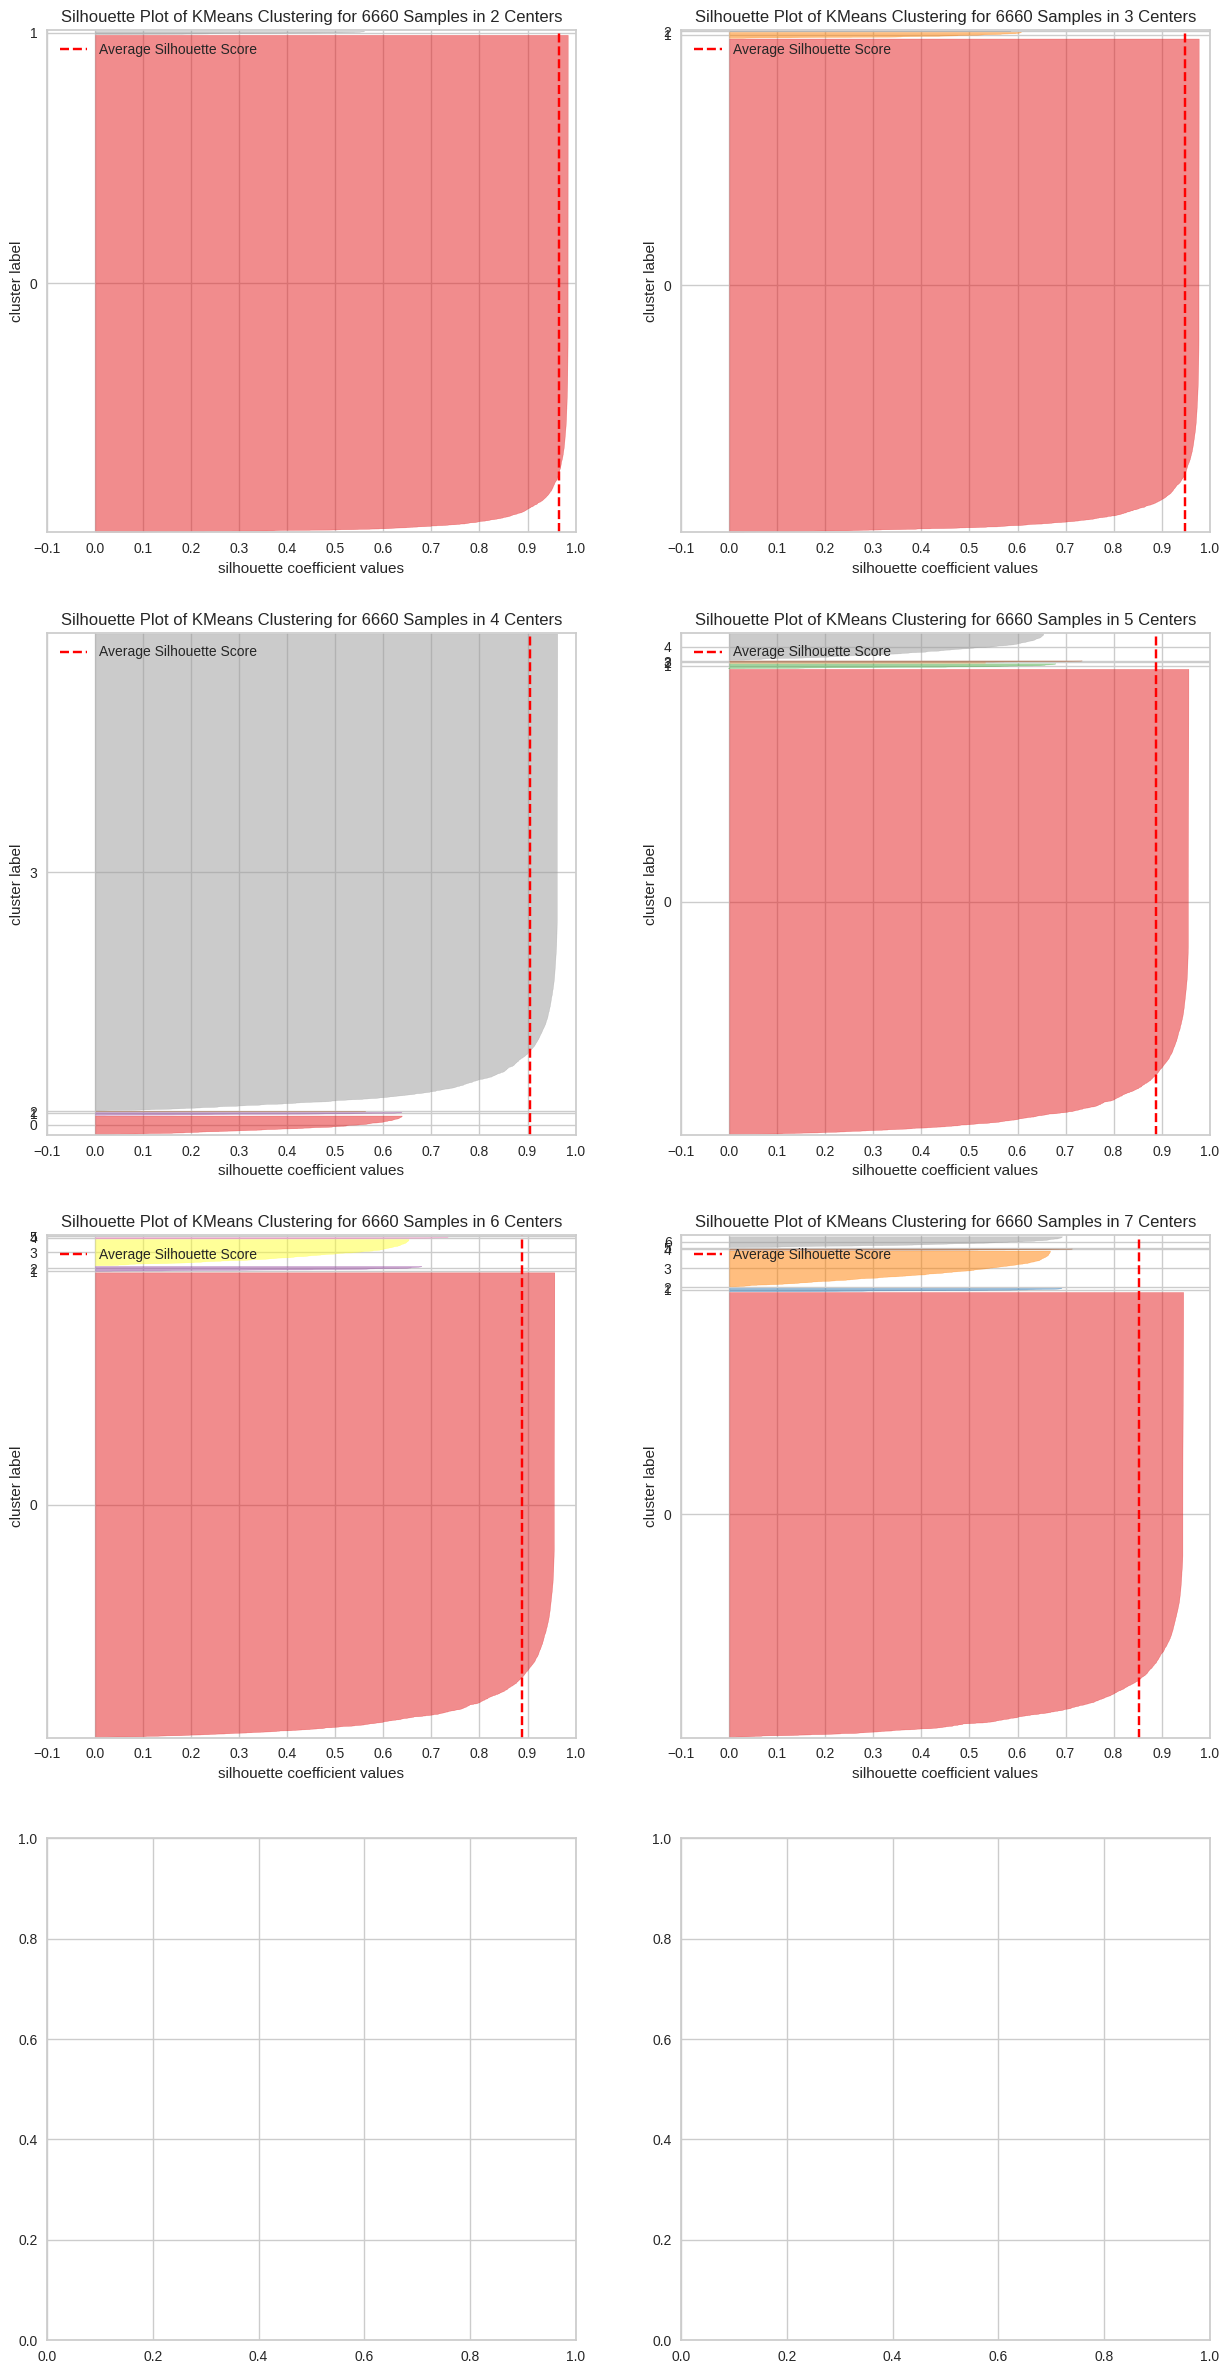

In [ ]:
# Silhouette score plot
K = range(2,8)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(X)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

## Interpreting the result

In [ ]:
rfm_seller = rfm_seller.reset_index()
rfm_seller

,seller_id,Recency,Frequency,MonetaryValue,cluster
0,631a50645b9755003d24d6b9,24,23,14305774,0
1,631a50655b9755003d24d78a,19,5,8257295,0
2,631a50655b9755003d24d7fe,67,1,790875,0
3,631a50675b9755003d24da41,10,27,21494890,0
4,631a50685b9755003d24dd24,5,2,553112,0
...,...,...,...,...,...
6655,63aa720fcb47446d5bdf1413,208,2,2130,2
6656,63aa7f65cb47446d5be08839,13,1,10875,0
6657,63aa832bcb47446d5be0c3dd,32,2,250,0
6658,63aabe5ccb47446d5be51656,40,3,3396922,0


In [ ]:
# We Group the data to see unique user characteristics
rfm_seller_clust = rfm_seller.groupby('cluster').agg({
    'seller_id' : 'count',
    'Recency': 'sum',
    'Frequency': 'sum',
    'MonetaryValue' : 'sum'
}).reset_index()

rfm_seller_clust

,cluster,seller_id,Recency,Frequency,MonetaryValue
0,0,5302,173940,381867,67549890259
1,1,23,36,87901,15609303738
2,2,1335,289590,4791,1743533716


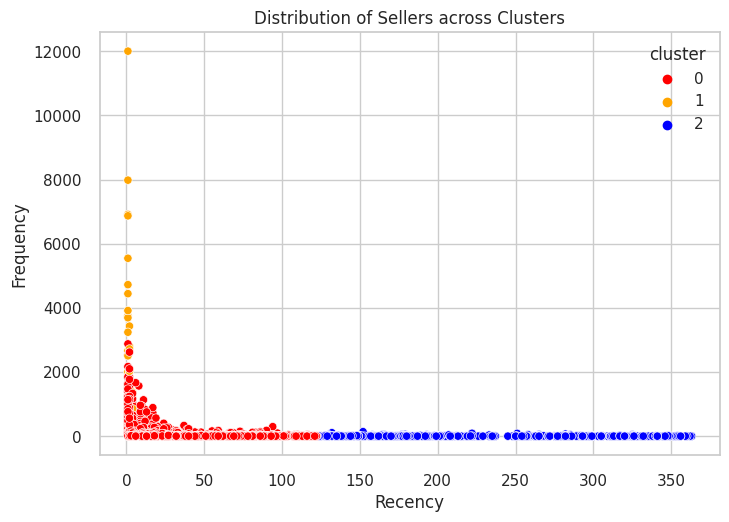

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=rfm_seller, palette=['red', 'orange', 'blue'])

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Sellers across Clusters')

plt.show()

Cluster 0 :
- The recency value of 289590 suggests that these sellers have had their most recent transaction quite some time ago.
- The high frequency value of 4791 indicates that the number of sellers is smaller, they have a relatively high level of customer engagement.
- The substantial monetary value of 1743533716 suggests these sellers have generated a relatively lower amount of revenue compared to the other clusters.

Cluster 1 :
- The recency value of 173940 suggests that these sellers have had their most recent transaction a while ago, similar to Cluster 0
- The high frequency value of 381867 indicates that these sellers have made a significant number of transactions, suggesting they have an established customer base or a high level of customer engagement.
- The substantial monetary value of 67549890259 suggests these sellers have generated a significant amount of revenue.

Cluster 2 :
- Cluster 2 has a smaller number of sellers compared to others, indicating a more focused or specific group of sellers.
- The recency value of 36 indicates that these sellers have made a purchase more recently compared to others.
- The high frequency value of 87901 indicates that while the number of sellers is smaller, they have a relatively high level of customer engagement.
- The substantial monetary value of 15609303738 suggests that these sellers have generated a substantial amount of revenue, although it is lower compared to Cluster 1.

In [ ]:
# Merge numeric column from df_trans to cluster_result based on 'seller_id'
rfm_seller = rfm_seller.merge(trans, on='seller_id', how='inner')

# Print the updated cluster_results DataFrame
print(rfm_seller)

                       seller_id  Recency  Frequency  MonetaryValue  cluster              po_number transaction_date  order_id         order_status payment_group           shipping_agency  shipping_cost  total_project_value  revenue seller_category                  buyer_id seller_province      seller_city seller_flag buyer_province       buyer_city buyer_flag                product_id                                       product_name                 main_cat        brand  price_per_item  \
0       631a50645b9755003d24d6b9       24         23       14305774        0  PO-2022-10-11-4866339       2022-10-11    426155              Selesai           TOP                 mps-briva              0             78775501   590816           Kecil  631a5c7f8755a8a989600737         Jakarta  Jakarta Selatan      Seller        Jakarta    Jakarta Pusat      Buyer  631addafcdc00cf233d72eea   Neonbox LED dengan tiang Saung Pananjung Bandung         Jasa Advertising         None      6000000.00   
1     

In [ ]:
rfm_seller.set_index('transaction_date', inplace=True)

In [ ]:
rfm_seller.groupby(['cluster'])['cluster'].resample('M').count().sort_values(ascending=False)

cluster  transaction_date
0        2022-12-31          52126
         2022-10-31          48325
         2022-11-30          39630
         2022-09-30          35116
         2022-08-31          34307
         2022-07-31          33477
         2022-06-30          30943
         2022-03-31          28813
         2022-04-30          24358
         2022-05-31          19947
         2022-02-28          17605
         2022-01-31          17220
1        2022-12-31          11749
         2022-10-31          10597
         2022-11-30           9297
         2022-09-30           7977
         2022-08-31           7475
         2022-03-31           7387
         2022-07-31           7374
         2022-06-30           7332
         2022-04-30           5650
         2022-05-31           4539
         2022-01-31           4361
         2022-02-28           4163
2        2022-07-31            815
         2022-03-31            808
         2022-04-30            661
         2022-06-30          

In [ ]:
# And to check the pivot table of each categorical columns
for col in rfm_seller.select_dtypes(include='object').columns:

  # Create crosstab by columns
  df_pivot = rfm_seller[['cluster',col]].groupby('cluster').value_counts().reset_index().rename(columns = {0: 'values'})

  # Display pivot_table
  display(df_pivot.pivot(index=col, columns='cluster', values='values').fillna(0))

  print('\n')

cluster,0,1,2
seller_id,,,
631a50645b9755003d24d6b9,23.00,0.00,0.00
631a50655b9755003d24d78a,5.00,0.00,0.00
631a50655b9755003d24d7fe,1.00,0.00,0.00
631a50675b9755003d24da41,27.00,0.00,0.00
631a50685b9755003d24dd24,2.00,0.00,0.00
...,...,...,...
63aa720fcb47446d5bdf1413,0.00,0.00,2.00
63aa7f65cb47446d5be08839,1.00,0.00,0.00
63aa832bcb47446d5be0c3dd,2.00,0.00,0.00


cluster,0,1,2
po_number,,,
PO-2022-01-01-75795,1.00,0.00,0.00
PO-2022-01-01-75796,13.00,0.00,0.00
PO-2022-01-01-75797,1.00,0.00,0.00
PO-2022-01-01-75798,0.00,5.00,0.00
PO-2022-01-01-75799,1.00,0.00,0.00
...,...,...,...
PO-2022-12-31-9859126,3.00,0.00,0.00
PO-2022-12-31-9864774,1.00,0.00,0.00
PO-2022-12-31-9963077,1.00,0.00,0.00


cluster,0,1,2
order_status,,,
Dibatalkan,12079.00,2883.00,190.00
Dibatalkan Otomatis,1600.00,375.00,0.00
Dibayar,185.00,42.00,0.00
Dikirim,1175.00,285.00,9.00
Diproses Penjual,1028.00,192.00,9.00
Disetujui,885.00,183.00,7.00
Diterima,652.00,252.00,12.00
Ditolak,2991.00,653.00,0.00
Ditolak Penjual,10161.00,2572.00,146.00


cluster,0,1,2
payment_group,,,
Direct,103922,17245,1460
TOP,277945,70656,3331


cluster,0,1,2
shipping_agency,,,
BTNATM,1172.00,17.00,14.00
QREN,4699.00,343.00,39.00
bni_ecoll_va,48532.00,11612.00,611.00
finpay_cc,101.00,6.00,1.00
link_aja_wco,529.00,19.00,16.00
mandiri_va_billing_fixed,86768.00,19749.00,1288.00
mandiriva,108694.00,32691.00,1203.00
mps-bniva,59435.00,16797.00,515.00
mps-briva,27745.00,2213.00,367.00


cluster,0,1,2
seller_category,,,
Besar,809.00,2721.00,66.00
Kecil,137138.00,32764.00,1551.00
Menengah,132174.00,37276.00,908.00
Mikro,111554.00,15140.00,2232.00
Swasta,192.00,0.00,34.00


cluster,0,1,2
buyer_id,,,
631a4da47255a77e0e6d7410,59.00,0.00,2.00
631a4f977255a77e0e6dec73,389.00,1.00,0.00
631a51497255a77e0e6eb585,73.00,0.00,0.00
631a514d7255a77e0e6eb6e5,4.00,0.00,0.00
631a514e7255a77e0e6eb785,1.00,0.00,0.00
...,...,...,...
63b0642410d7d4a770888d88,1.00,0.00,0.00
63b0643d10d7d4a770888e72,1.00,0.00,0.00
63b0656910d7d4a770889040,1.00,0.00,0.00


cluster,0,1,2
seller_province,,,
Bali,6864.00,0.00,49.00
Banten,11862.00,0.00,212.00
Bengkulu,915.00,0.00,9.00
D.I. Aceh,3325.00,0.00,132.00
D.I. Yogyakarta,4669.00,0.00,69.00
Gorontalo,1300.00,0.00,47.00
Jakarta,89548.00,38176.00,1003.00
Jambi,4273.00,0.00,37.00
Jawa Barat,74821.00,23274.00,552.00


cluster,0,1,2
seller_city,,,
Jakarta Barat,11263.00,13787.00,96.00
Jakarta Pusat,14848.00,10370.00,196.00
Jakarta Selatan,25759.00,3242.00,381.00
Jakarta Timur,23398.00,10777.00,224.00
Jakarta Utara,14280.00,0.00,106.00
...,...,...,...
Kota Tebing Tinggi,868.00,0.00,0.00
Kota Tegal,82.00,0.00,4.00
Kota Ternate,80.00,0.00,2.00


cluster,0,1,2
seller_flag,,,
Seller,381867,87901,4791


cluster,0,1,2
buyer_province,,,
Bali,7414.00,10.00,32.00
Banten,10441.00,1553.00,155.00
Bengkulu,608.00,8.00,7.00
D.I. Aceh,3383.00,24.00,235.00
D.I. Yogyakarta,3799.00,4.00,64.00
Gorontalo,1372.00,0.00,50.00
Jakarta,117430.00,45837.00,1675.00
Jambi,2296.00,12.00,39.00
Jawa Barat,59526.00,11989.00,337.00


cluster,0,1,2
buyer_city,,,
Jakarta Barat,4638.00,1786.00,37.00
Jakarta Pusat,33978.00,20000.00,728.00
Jakarta Selatan,48625.00,18012.00,448.00
Jakarta Timur,21450.00,5067.00,385.00
Jakarta Utara,8739.00,972.00,77.00
...,...,...,...
Kota Tasikmalaya,873.00,1.00,2.00
Kota Tebing Tinggi,1949.00,2.00,0.00
Kota Tegal,58.00,0.00,1.00


cluster,0,1,2
buyer_flag,,,
Buyer,377460,87825,4651


cluster,0,1,2
product_id,,,
631ab35bcdc00cf233d4be8a,2.00,0.00,0.00
631ab35bcdc00cf233d4be8c,2.00,0.00,0.00
631ab35bcdc00cf233d4be8e,2.00,0.00,0.00
631ab35bcdc00cf233d4be99,2.00,0.00,0.00
631ab35bcdc00cf233d4be9b,2.00,0.00,0.00
...,...,...,...
63affd1c2618ee3b639bb18f,1.00,0.00,0.00
63affded2618ee3b639bb272,1.00,0.00,0.00
63affed7d45677a859d04bf4,1.00,0.00,0.00


cluster,0,1,2
product_name,,,
\tBaju Corporate Telkom Pria ukuran XXL,1.00,0.00,0.00
\tCatering Makan Siang (VIP) - Khusus BCV,1.00,0.00,0.00
\tKartu Nasabah MM10 Konvensional 8jt 26mg,1.00,0.00,0.00
\tPILOT BALLINER BL-5M BLACK,0.00,0.00,1.00
\tPengadaan ATK Dept. QHSE November 2022,1.00,0.00,0.00
...,...,...,...
you c1000 sekarton isi 30 (khusus Jakarta),1.00,0.00,0.00
you do you,0.00,1.00,0.00
young on top,0.00,2.00,0.00


cluster,0,1,2
main_cat,,,
Bahan Kimia,2260.00,642.00,34.00
Barang Lainnya,20826.00,1811.00,617.00
Buku,519.00,42.00,5.00
Dapur,1429.00,111.00,19.00
Elektronik,31613.00,4106.00,458.00
Fashion,1033.00,106.00,25.00
Fashion Anak & Bayi,3.00,0.00,0.00
Fashion Muslim,153.00,1.00,9.00
Fashion Pria,426.00,17.00,8.00


cluster,0,1,2
brand,,,
,3.00,0.00,0.00
,1.00,0.00,0.00
Western Digital,1.00,0.00,0.00
Max,2.00,0.00,0.00
21019300,0.00,8.00,0.00
...,...,...,...
zebra sarasa,2.00,0.00,0.00
zetalux,1.00,0.00,0.00
zigebaffel,14.00,0.00,0.00


cluster,0,1,2
unit,,,
-,8.00,0.00,0.00
0,1.00,0.00,0.00
1,111.00,0.00,0.00
1 (satu) paket,1.00,0.00,0.00
1 batch,0.00,0.00,1.00
...,...,...,...
voucher,0.00,13.00,0.00
wo,4.00,0.00,0.00
zack,1.00,0.00,0.00


In [ ]:
rfm_seller.groupby('cluster').mean().T

cluster,0,1,2
Recency,8.72,1.24,202.04
Frequency,594.24,5545.11,23.46
MonetaryValue,71138096.04,594528297.01,8171211.13
order_id,298033.06,296802.30,192786.41
shipping_cost,124893.65,36512.49,251653.96
total_project_value,25388180.21,29831445.21,67136222.64
revenue,176893.76,177578.23,363918.54
price_per_item,4680450.86,1668509.23,10889993.85
quantity,194.13,53.82,405.41
price_total,7626296.91,3817410.08,17500729.43


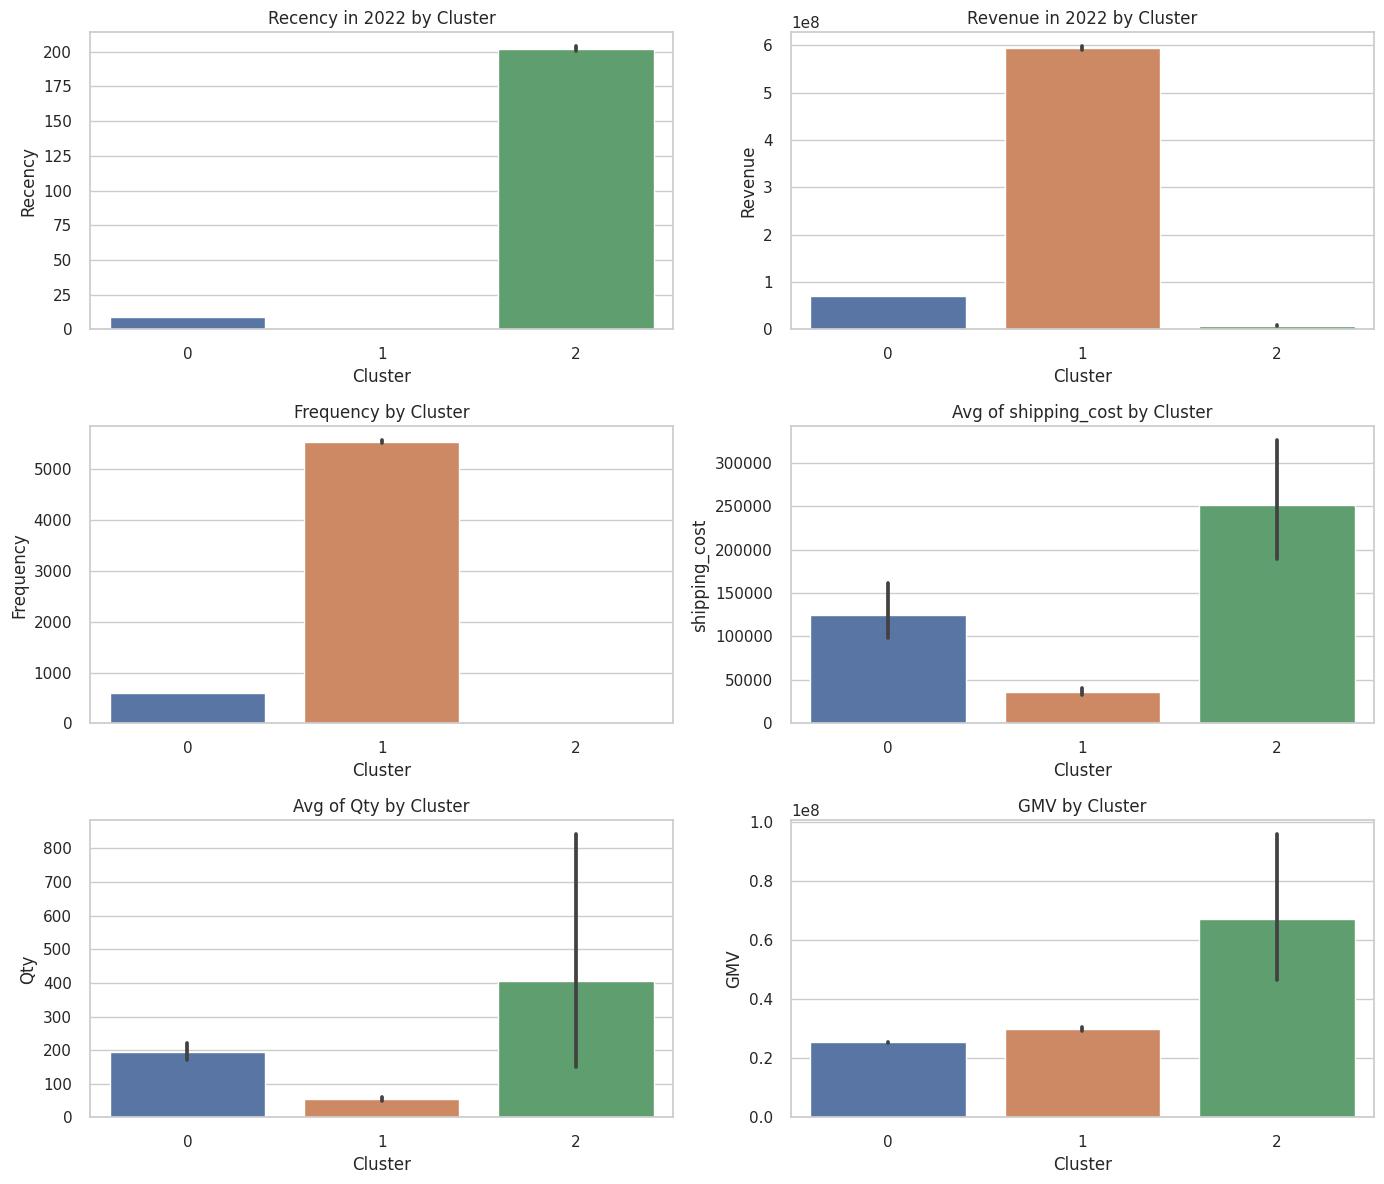

In [ ]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Bar plot for Revenue
sns.barplot(x='cluster', y='Recency', data=rfm_seller, ax=axes[0, 0])
axes[0, 0].set_title('Recency in 2022 by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Recency')

# Bar plot for GMV
sns.barplot(x='cluster', y='MonetaryValue', data=rfm_seller, ax=axes[0, 1])
axes[0, 1].set_title('Revenue in 2022 by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Revenue')

# Bar plot for Avg_price_per_item
sns.barplot(x='cluster', y='Frequency', data=rfm_seller, ax=axes[1, 0])
axes[1, 0].set_title('Frequency by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Frequency')

# Bar plot for shipping_cost
sns.barplot(x='cluster', y='shipping_cost', data=rfm_seller, ax=axes[1, 1])
axes[1, 1].set_title('Avg of shipping_cost by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('shipping_cost')

# Bar plot for Qty
sns.barplot(x='cluster', y='quantity', data=rfm_seller, ax=axes[2, 0])
axes[2, 0].set_title('Avg of Qty by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Qty')

# Bar plot for Percentage_free_shipping
sns.barplot(x='cluster', y='total_project_value', data=rfm_seller, ax=axes[2, 1])
axes[2, 1].set_title('GMV by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('GMV')

# Adjust layout
plt.tight_layout()
plt.show()

# Buyer - KMeans

## Determining Variables

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)

In [ ]:
buyer = trans.copy()
buyer.reset_index(inplace=True)
buyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474570 entries, 0 to 474569
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     474570 non-null  datetime64[ns]
 1   po_number            474570 non-null  object        
 2   order_id             474570 non-null  Int64         
 3   order_status         474570 non-null  object        
 4   payment_group        474570 non-null  object        
 5   shipping_agency      474570 non-null  object        
 6   shipping_cost        474570 non-null  Int64         
 7   total_project_value  474570 non-null  Int64         
 8   revenue              474570 non-null  Int64         
 9   seller_id            474559 non-null  object        
 10  seller_category      474559 non-null  object        
 11  buyer_id             474570 non-null  object        
 12  seller_province      474559 non-null  object        
 13  seller_city   

In [ ]:
snapshot_date = buyer['transaction_date'].max() + pd.DateOffset(days=1)
rfm_buyer = buyer.groupby(['buyer_id']).agg({
    'transaction_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'revenue': 'sum'})
print(rfm_buyer)

                          transaction_date  order_id   revenue
buyer_id                                                      
631a4da47255a77e0e6d7410                11        61   1596942
631a4f977255a77e0e6dec73                 3       390  70239137
631a51497255a77e0e6eb585                 3        73  43940336
631a514d7255a77e0e6eb6e5                45         4     33357
631a514e7255a77e0e6eb785                97         1      5857
...                                    ...       ...       ...
63b0642410d7d4a770888d88               282         1       774
63b0643d10d7d4a770888e72                 4         1       774
63b0656910d7d4a770889040               179         1       774
63b0657e031d7b3fee1ab87d                59         1       774
63b0659310d7d4a77088905e               205         1       774

[12810 rows x 3 columns]


In [ ]:
rfm_buyer.rename(columns={'transaction_date': 'Recency',
                        'order_id': 'Frequency',
                        'revenue': 'Monetary'}, inplace=True)
print(rfm_buyer)

                          Recency  Frequency  Monetary
buyer_id                                              
631a4da47255a77e0e6d7410       11         61   1596942
631a4f977255a77e0e6dec73        3        390  70239137
631a51497255a77e0e6eb585        3         73  43940336
631a514d7255a77e0e6eb6e5       45          4     33357
631a514e7255a77e0e6eb785       97          1      5857
...                           ...        ...       ...
63b0642410d7d4a770888d88      282          1       774
63b0643d10d7d4a770888e72        4          1       774
63b0656910d7d4a770889040      179          1       774
63b0657e031d7b3fee1ab87d       59          1       774
63b0659310d7d4a77088905e      205          1       774

[12810 rows x 3 columns]


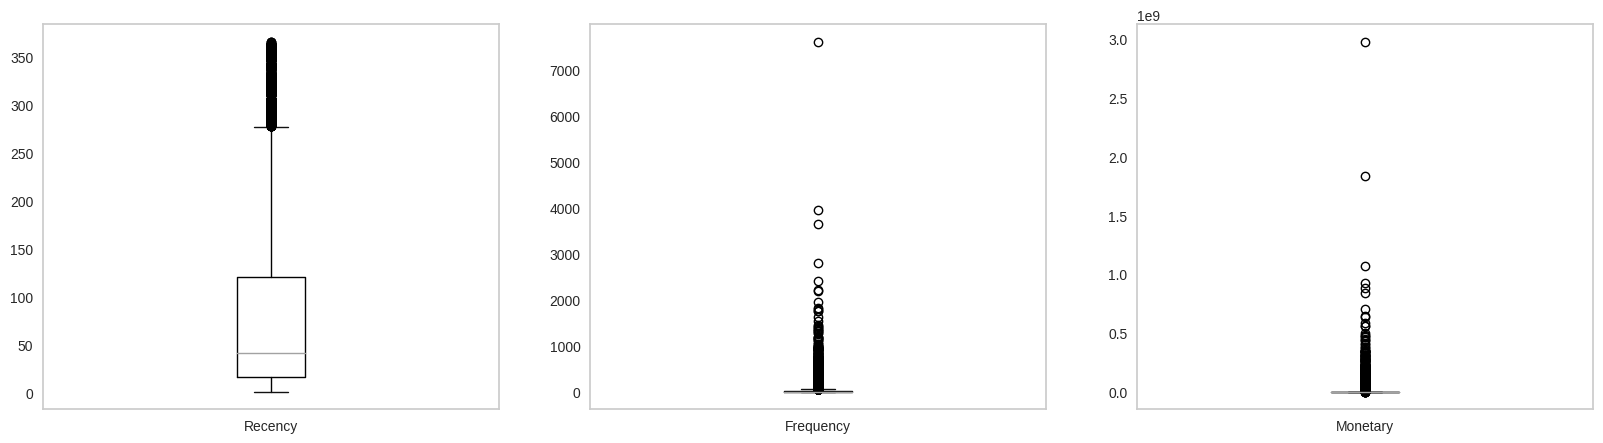

In [ ]:
# check outlier
col_list = ['Recency','Frequency','Monetary']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

# for 0 (i) , Income (el)
for i,el in enumerate(col_list):
    a = rfm_buyer.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
Y = rfm_buyer[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)
kmeans = KMeans(n_clusters=3)
kmeans.fit(Y_scaled)
rfm_buyer['cluster'] = kmeans.labels_

In [ ]:
rfm_buyer['cluster'].value_counts()

1    9664
0    3037
2     109
Name: cluster, dtype: int64

In [ ]:
rfm_buyer.groupby(['cluster'])['Recency', 'Frequency', 'Monetary'].mean()

,Recency,Frequency,Monetary
cluster,,,
0,222.20,2.49,206981.13
1,37.65,36.69,5045479.31
2,4.41,1031.17,325826640.89


<Axes: xlabel='cluster', ylabel='Recency'>

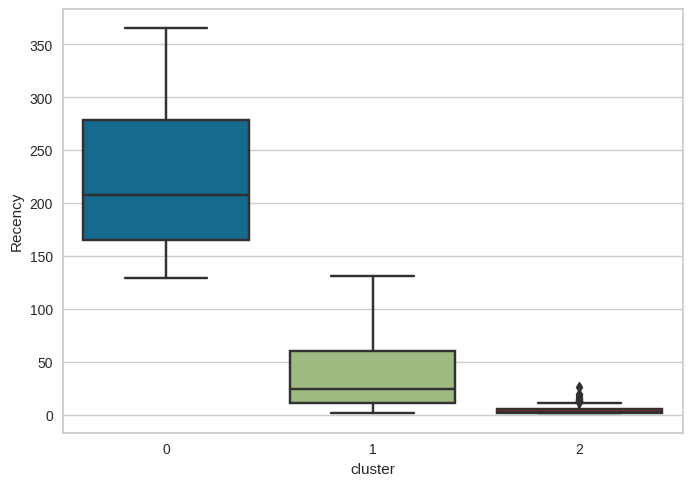

In [ ]:
sns.boxplot(data = rfm_buyer, x = 'cluster', y = 'Recency')

<Axes: xlabel='cluster', ylabel='Frequency'>

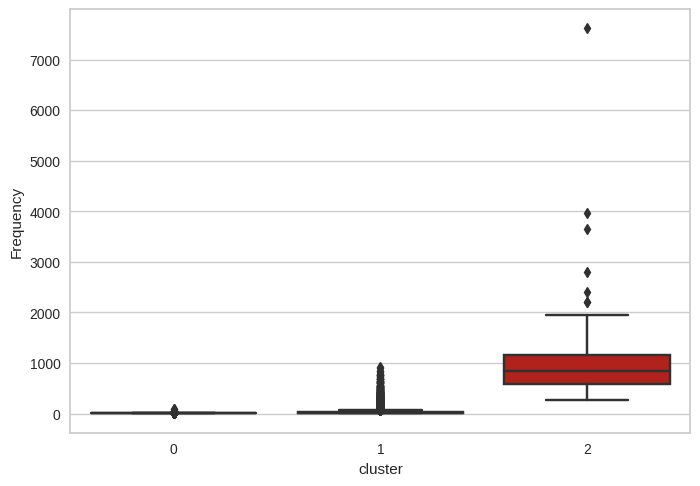

In [ ]:
sns.boxplot(data = rfm_buyer, x = 'cluster', y = 'Frequency')

<Axes: xlabel='cluster', ylabel='Monetary'>

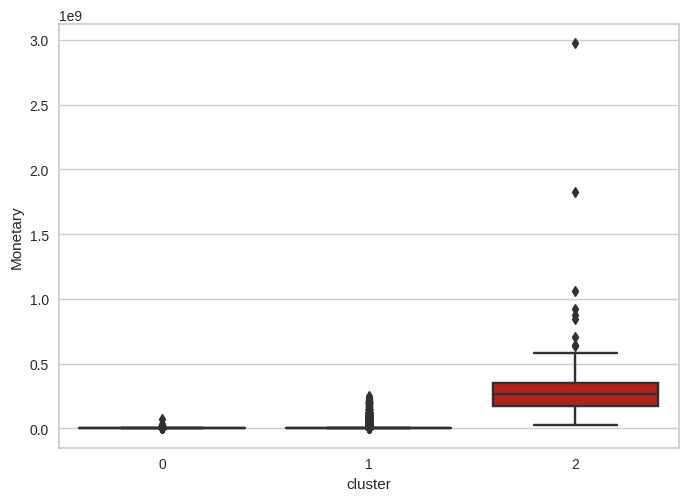

In [ ]:
sns.boxplot(data = rfm_buyer, x = 'cluster', y = 'Monetary')

In [ ]:
# Let's re-look into data after clustering
# This take some time, no worries!
sns.pairplot(rfm_seller ,hue='cluster', diag_kind="hist")

## Elbow Method

In [ ]:
# K-Means Clustering
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(Y)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

## Silhouette

In [ ]:
#import silhouette
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

In [ ]:
# Silhouette score plot
K = range(2,8)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(Y)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

## Interpreting the result

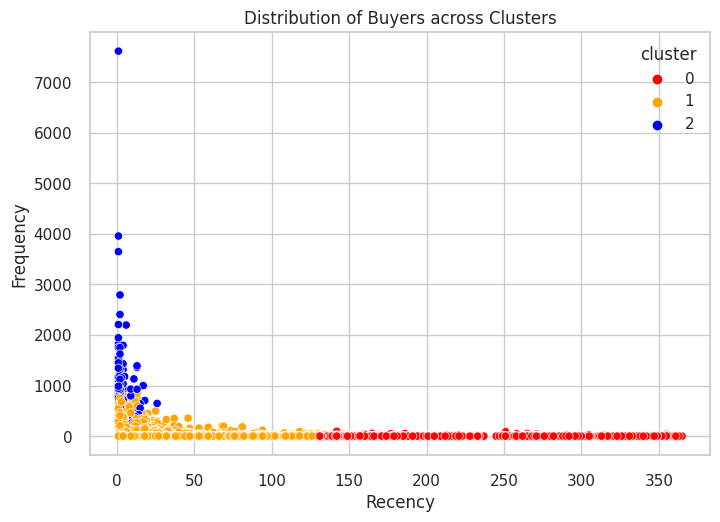

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=rfm_buyer, palette=['red', 'orange', 'blue'])

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Buyers across Clusters')

plt.show()

In [ ]:
rfm_buyer = rfm_buyer.reset_index()
rfm_buyer

,buyer_id,Recency,Frequency,Monetary,cluster
0,631a4da47255a77e0e6d7410,11,61,1596942,1
1,631a4f977255a77e0e6dec73,3,390,70239137,1
2,631a51497255a77e0e6eb585,3,73,43940336,1
3,631a514d7255a77e0e6eb6e5,45,4,33357,1
4,631a514e7255a77e0e6eb785,97,1,5857,1
...,...,...,...,...,...
12805,63b0642410d7d4a770888d88,282,1,774,0
12806,63b0643d10d7d4a770888e72,4,1,774,1
12807,63b0656910d7d4a770889040,179,1,774,0
12808,63b0657e031d7b3fee1ab87d,59,1,774,1


In [ ]:
# We Group the data to see unique user characteristics
rfm_buyer_clust = rfm_buyer.groupby('cluster').agg({
    'buyer_id' : 'count',
    'Recency': 'sum',
    'Frequency': 'sum',
    'Monetary' : 'sum'
}).reset_index()

rfm_buyer_clust

,cluster,buyer_id,Recency,Frequency,Monetary
0,0,3037,674832,7571,628601690
1,1,9664,363864,354601,48759512067
2,2,109,481,112398,35515103857


In [ ]:
# Merge numeric column from df_trans to cluster_result based on 'seller_id'
rfm_buyer = rfm_buyer.merge(trans, on='buyer_id', how='inner')

# Print the updated cluster_results DataFrame
print(rfm_buyer)

                        buyer_id  Recency  Frequency  Monetary  cluster              po_number  order_id order_status payment_group           shipping_agency  shipping_cost  total_project_value  revenue                 seller_id seller_category seller_province      seller_city seller_flag buyer_province    buyer_city buyer_flag                product_id                                       product_name                main_cat       brand  price_per_item  quantity  price_total  free_shipping  \
0       631a4da47255a77e0e6d7410       11         61   1596942        1   PO-2022-07-18-142226    107420      Selesai           TOP  mandiri_va_billing_fixed         100000               109000      817  631a53a57255a77e0e6f4aa2           Mikro         Jakarta  Jakarta Selatan      Seller     Jawa Barat  Kota Cirebon      Buyer  631abfa7cdc00cf233d552ca  Tumblr Souvenir Merk ACE Murah Hemat (Testing ...  Souvenir & Merchandise        None         4500.00         2         9000          False   


In [ ]:
rfm_buyer.set_index('transaction_date', inplace=True)

KeyError: ignored

In [ ]:
rfm_buyer.groupby(['cluster'])['cluster'].resample('M').count().sort_values(ascending=False)

TypeError: ignored

In [ ]:
# And to check the pivot table of each categorical columns
for col in rfm_buyer.select_dtypes(include='object').columns:

  # Create crosstab by columns
  df_pivot = rfm_buyer[['cluster',col]].groupby('cluster').value_counts().reset_index().rename(columns = {0: 'values'})

  # Display pivot_table
  display(df_pivot.pivot(index=col, columns='cluster', values='values').fillna(0))

  print('\n')

cluster,0,1,2
buyer_id,,,
631a4da47255a77e0e6d7410,0.00,61.00,0.00
631a4f977255a77e0e6dec73,0.00,390.00,0.00
631a51497255a77e0e6eb585,0.00,73.00,0.00
631a514d7255a77e0e6eb6e5,0.00,4.00,0.00
631a514e7255a77e0e6eb785,0.00,1.00,0.00
...,...,...,...
63b0642410d7d4a770888d88,1.00,0.00,0.00
63b0643d10d7d4a770888e72,0.00,1.00,0.00
63b0656910d7d4a770889040,1.00,0.00,0.00


cluster,0,1,2
po_number,,,
PO-2022-01-01-75795,0.00,1.00,0.00
PO-2022-01-01-75796,0.00,13.00,0.00
PO-2022-01-01-75797,0.00,1.00,0.00
PO-2022-01-01-75798,0.00,0.00,5.00
PO-2022-01-01-75799,0.00,1.00,0.00
...,...,...,...
PO-2022-12-31-9859126,0.00,3.00,0.00
PO-2022-12-31-9864774,0.00,1.00,0.00
PO-2022-12-31-9963077,0.00,1.00,0.00


cluster,0,1,2
order_status,,,
Dibatalkan,306.00,11089.00,3757.00
Dibatalkan Otomatis,0.00,1662.00,313.00
Dibayar,0.00,170.00,57.00
Dikirim,8.00,1095.00,366.00
Diproses Penjual,21.00,924.00,284.00
Disetujui,18.00,786.00,271.00
Diterima,36.00,743.00,137.00
Ditolak,0.00,2698.00,946.00
Ditolak Penjual,309.00,9449.00,3121.00


cluster,0,1,2
payment_group,,,
Direct,5737,109129,7771
TOP,1834,245472,104627


cluster,0,1,2
shipping_agency,,,
BTNATM,52.00,615.00,536.00
QREN,253.00,4424.00,404.00
bni_ecoll_va,806.00,49025.00,10924.00
finpay_cc,12.00,96.00,0.00
link_aja_wco,38.00,513.00,13.00
mandiri_va_billing_fixed,1031.00,76065.00,30709.00
mandiriva,1401.00,101805.00,39383.00
mps-bniva,890.00,61320.00,14538.00
mps-briva,500.00,20646.00,9188.00


cluster,0,1,2
seller_id,,,
631a50645b9755003d24d6b9,0.00,23.00,0.00
631a50655b9755003d24d78a,0.00,5.00,0.00
631a50655b9755003d24d7fe,0.00,0.00,1.00
631a50675b9755003d24da41,0.00,0.00,27.00
631a50685b9755003d24dd24,0.00,0.00,2.00
...,...,...,...
63aa720fcb47446d5bdf1413,2.00,0.00,0.00
63aa7f65cb47446d5be08839,0.00,1.00,0.00
63aa832bcb47446d5be0c3dd,0.00,2.00,0.00


cluster,0,1,2
seller_category,,,
Besar,55,740,2801
Kecil,2433,124891,44129
Menengah,2427,127367,40564
Mikro,2646,101396,24884
Swasta,10,197,19


cluster,0,1,2
seller_province,,,
Bali,78.00,6828.00,7.00
Banten,605.00,10109.00,1360.00
Bengkulu,12.00,827.00,85.00
D.I. Aceh,18.00,2162.00,1277.00
D.I. Yogyakarta,225.00,4348.00,165.00
Gorontalo,0.00,1347.00,0.00
Jakarta,1489.00,91815.00,35423.00
Jambi,688.00,3095.00,527.00
Jawa Barat,1746.00,66885.00,30016.00


cluster,0,1,2
seller_city,,,
Jakarta Barat,198.00,19069.00,5879.00
Jakarta Pusat,286.00,16950.00,8178.00
Jakarta Selatan,468.00,23743.00,5171.00
Jakarta Timur,409.00,22403.00,11587.00
Jakarta Utara,128.00,9650.00,4608.00
...,...,...,...
Kota Tebing Tinggi,1.00,447.00,420.00
Kota Tegal,2.00,61.00,23.00
Kota Ternate,2.00,80.00,0.00


cluster,0,1,2
seller_flag,,,
Seller,7571,354591,112397


cluster,0,1,2
buyer_province,,,
Bali,61.00,7395.00,0.00
Banten,94.00,9030.00,3025.00
Bengkulu,15.00,608.00,0.00
D.I. Aceh,15.00,2347.00,1280.00
D.I. Yogyakarta,99.00,3768.00,0.00
Gorontalo,3.00,1419.00,0.00
Jakarta,3876.00,116994.00,44074.00
Jambi,39.00,1912.00,396.00
Jawa Barat,697.00,45981.00,25174.00


cluster,0,1,2
buyer_city,,,
Jakarta Barat,79.00,4951.00,1431.00
Jakarta Pusat,3272.00,37454.00,13981.00
Jakarta Selatan,313.00,47274.00,19499.00
Jakarta Timur,174.00,23208.00,3520.00
Jakarta Utara,38.00,4107.00,5643.00
...,...,...,...
Kota Tasikmalaya,6.00,870.00,0.00
Kota Tebing Tinggi,10.00,1021.00,920.00
Kota Tegal,4.00,55.00,0.00


cluster,0,1,2
buyer_flag,,,
Buyer,6797,350752,112398


cluster,0,1,2
product_id,,,
631ab35bcdc00cf233d4be8a,0.00,0.00,2.00
631ab35bcdc00cf233d4be8c,0.00,0.00,2.00
631ab35bcdc00cf233d4be8e,0.00,0.00,2.00
631ab35bcdc00cf233d4be99,0.00,0.00,2.00
631ab35bcdc00cf233d4be9b,0.00,0.00,2.00
...,...,...,...
63affd1c2618ee3b639bb18f,0.00,1.00,0.00
63affded2618ee3b639bb272,0.00,1.00,0.00
63affed7d45677a859d04bf4,0.00,1.00,0.00


cluster,0,1,2
product_name,,,
\tBaju Corporate Telkom Pria ukuran XXL,0.00,1.00,0.00
\tCatering Makan Siang (VIP) - Khusus BCV,0.00,1.00,0.00
\tKartu Nasabah MM10 Konvensional 8jt 26mg,0.00,1.00,0.00
\tPILOT BALLINER BL-5M BLACK,1.00,0.00,0.00
\tPengadaan ATK Dept. QHSE November 2022,0.00,1.00,0.00
...,...,...,...
you c1000 sekarton isi 30 (khusus Jakarta),0.00,1.00,0.00
you do you,0.00,1.00,0.00
young on top,0.00,2.00,0.00


cluster,0,1,2
main_cat,,,
Bahan Kimia,13.00,1586.00,1337.00
Barang Lainnya,198.00,16679.00,6377.00
Buku,2.00,424.00,140.00
Dapur,35.00,1057.00,467.00
Elektronik,332.00,26346.00,9499.00
Fashion,52.00,969.00,143.00
Fashion Anak & Bayi,0.00,3.00,0.00
Fashion Muslim,8.00,153.00,2.00
Fashion Pria,8.00,383.00,60.00


cluster,0,1,2
brand,,,
,0.00,3.00,0.00
,0.00,0.00,1.00
Western Digital,0.00,1.00,0.00
Max,0.00,2.00,0.00
21019300,0.00,8.00,0.00
...,...,...,...
zebra sarasa,0.00,2.00,0.00
zetalux,0.00,1.00,0.00
zigebaffel,0.00,14.00,0.00


cluster,0,1,2
unit,,,
-,0.00,8.00,0.00
0,0.00,1.00,0.00
1,5.00,90.00,16.00
1 (satu) paket,0.00,1.00,0.00
1 batch,0.00,1.00,0.00
...,...,...,...
voucher,0.00,13.00,0.00
wo,0.00,4.00,0.00
zack,0.00,0.00,1.00


In [ ]:
rfm_buyer.groupby('cluster').mean().T

cluster,0,1,2
Recency,208.51,14.16,3.44
Frequency,11.54,210.77,1783.79
Monetary,1983643.13,25565198.35,504726019.04
order_id,194837.98,298972.28,296575.60
shipping_cost,84177.21,86939.54,183648.89
total_project_value,11508582.47,20089299.04,48292852.50
revenue,83027.56,137505.29,315976.30
price_per_item,1300185.52,4199722.16,4333664.32
quantity,120.59,174.68,159.71
price_total,2703671.07,6719925.56,8259241.35


In [ ]:
rfm_buyer.info()

In [ ]:
# Create subplots with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

# Bar plot for Revenue
sns.barplot(x='cluster', y='Recency', data=rfm_buyer, ax=axes[0, 0])
axes[0, 0].set_title('Recency in 2022 by Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Recency')

# Bar plot for GMV
sns.barplot(x='cluster', y='MonetaryValue', data=rfm_buyer, ax=axes[0, 1])
axes[0, 1].set_title('Revenue in 2022 by Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Revenue')

# Bar plot for Avg_price_per_item
sns.barplot(x='cluster', y='Frequency', data=rfm_buyer, ax=axes[1, 0])
axes[1, 0].set_title('Frequency by Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Frequency')

# Bar plot for shipping_cost
sns.barplot(x='cluster', y='price_total', data=rfm_buyer, ax=axes[1, 1])
axes[1, 1].set_title('Price by Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('shipping_cost')

# Bar plot for Qty
sns.barplot(x='cluster', y='quantity', data=rfm_buyer, ax=axes[2, 0])
axes[2, 0].set_title('Avg of Qty by Cluster')
axes[2, 0].set_xlabel('Cluster')
axes[2, 0].set_ylabel('Qty')

# Bar plot for Percentage_free_shipping
sns.barplot(x='cluster', y='revenue', data=rfm_buyer, ax=axes[2, 1])
axes[2, 1].set_title('GMV by Cluster')
axes[2, 1].set_xlabel('Cluster')
axes[2, 1].set_ylabel('GMV')

# Adjust layout
plt.tight_layout()
plt.show()